In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay

# Exploratory DATA ANALYSIS

In [134]:
dataset = pd.read_csv("/kaggle/input/heart-disease-prediction-using-logistic-regression/framingham.csv")
dataset.head()

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

In [135]:
dataset.shape

(4238, 16)

In [136]:
dataset.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [137]:
dataset.describe()

male          age    education  currentSmoker   cigsPerDay  \
count  4238.000000  4238.000000  4133.000000    4238.000000  4209.000000   
mean      0.429212    49.584946     1.978950       0.494101     9.003089   
std       0.495022     8.572160     1.019791       0.500024    11.920094   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  4185.000000      4238.000000   4238.000000  4238.000000  4188.000000   
mean      0.029630         0.005899      0.310524     0.025720   236.721585   
std       0.169584         0.076587      0.462763     0.158316    44.590334   
min       0.000000         0.000000      0.000000     0.000000   107.000000   
25%       0.000000         0.000000      0.000000     0.000000   206.000000   
50%       0.000000         0.000000      0.000000     0.000000   234.000000   
75%       0.000000         0.000000      1.000000     0.000000   263.000000   
max       1.000000         1.000000      1.000000     1.000000   696.000000   

             sysBP        diaBP          BMI    heartRate      glucose  \
count  4238.000000  4238.000000  4219.000000  4237.000000  3850.000000   
mean    132.352407    82.893464    25.802008    75.878924    81.966753   
std      22.038097    11.910850     4.080111    12.026596    23.959998   
min      83.500000    48.000000    15.540000    44.000000    40.000000   
25%     117.000000    75.000000    23.070000    68.000000    71.000000   
50%     128.000000    82.000000    25.400000    75.000000    78.000000   
75%     144.000000    89.875000    28.040000    83.000000    87.000000   
max     295.000000   142.500000    56.800000   143.000000   394.000000   

        TenYearCHD  
count  4238.000000  
mean      0.151958  
std       0.359023  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

In [138]:
dataset.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

<Axes: xlabel='TenYearCHD', ylabel='count'>

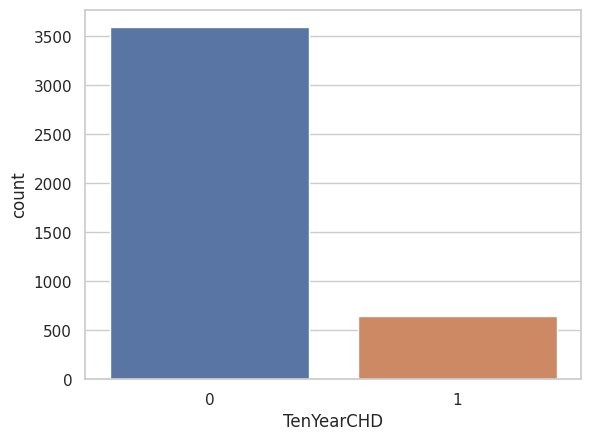

In [139]:
sn.countplot(x='TenYearCHD',data=dataset)

<Axes: >

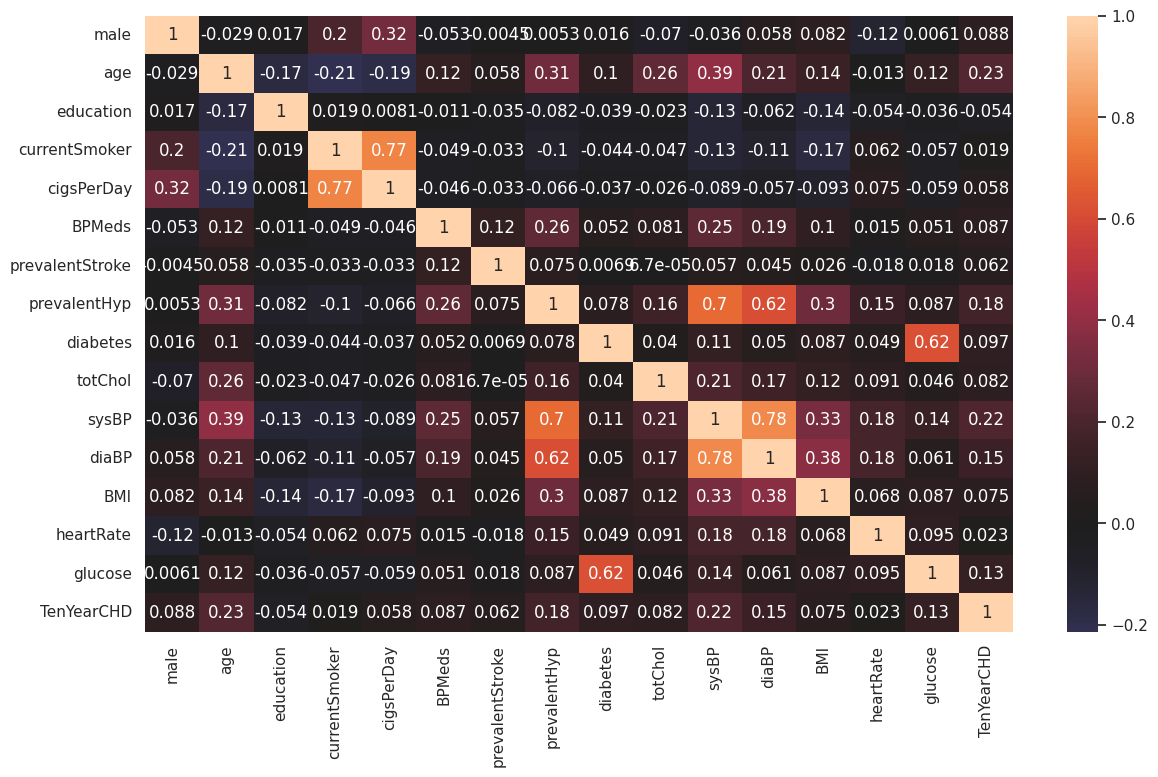

In [140]:
corr_matrix=dataset.corr()
plt.figure(1, figsize=(14,8))
sn.heatmap(corr_matrix,center=0, annot=True)

Based on the heatmap of correlated features to the dataset, we can set a threshold of 0.1 to sensitivly select the most crucial affectable features on wether we can predict the heart disease in the person or not.

**for EXAMPLE :**
1. **age** : where age of the patient is an important factor and a continious variable
2. **prevalentHyp** : whether or not the patient was hypertensive and its a discrete variable.
3. **sysBP** : Medical continious variable defined as  systolic blood pressure.
4. **diaBP**: Medical continious info represents diastolic blood pressure.
5. **glucose**:  shows the glucose level and its a medical continious factor due to its correlation factor with the Target variable TenYearCHD

if we lower the threshold to 0.06 we can remark that we can embark more insightfull factor to our target variable prediction such as : **male,BPMeds,prevalentStroke , diabetes,Totcholl , BMI**

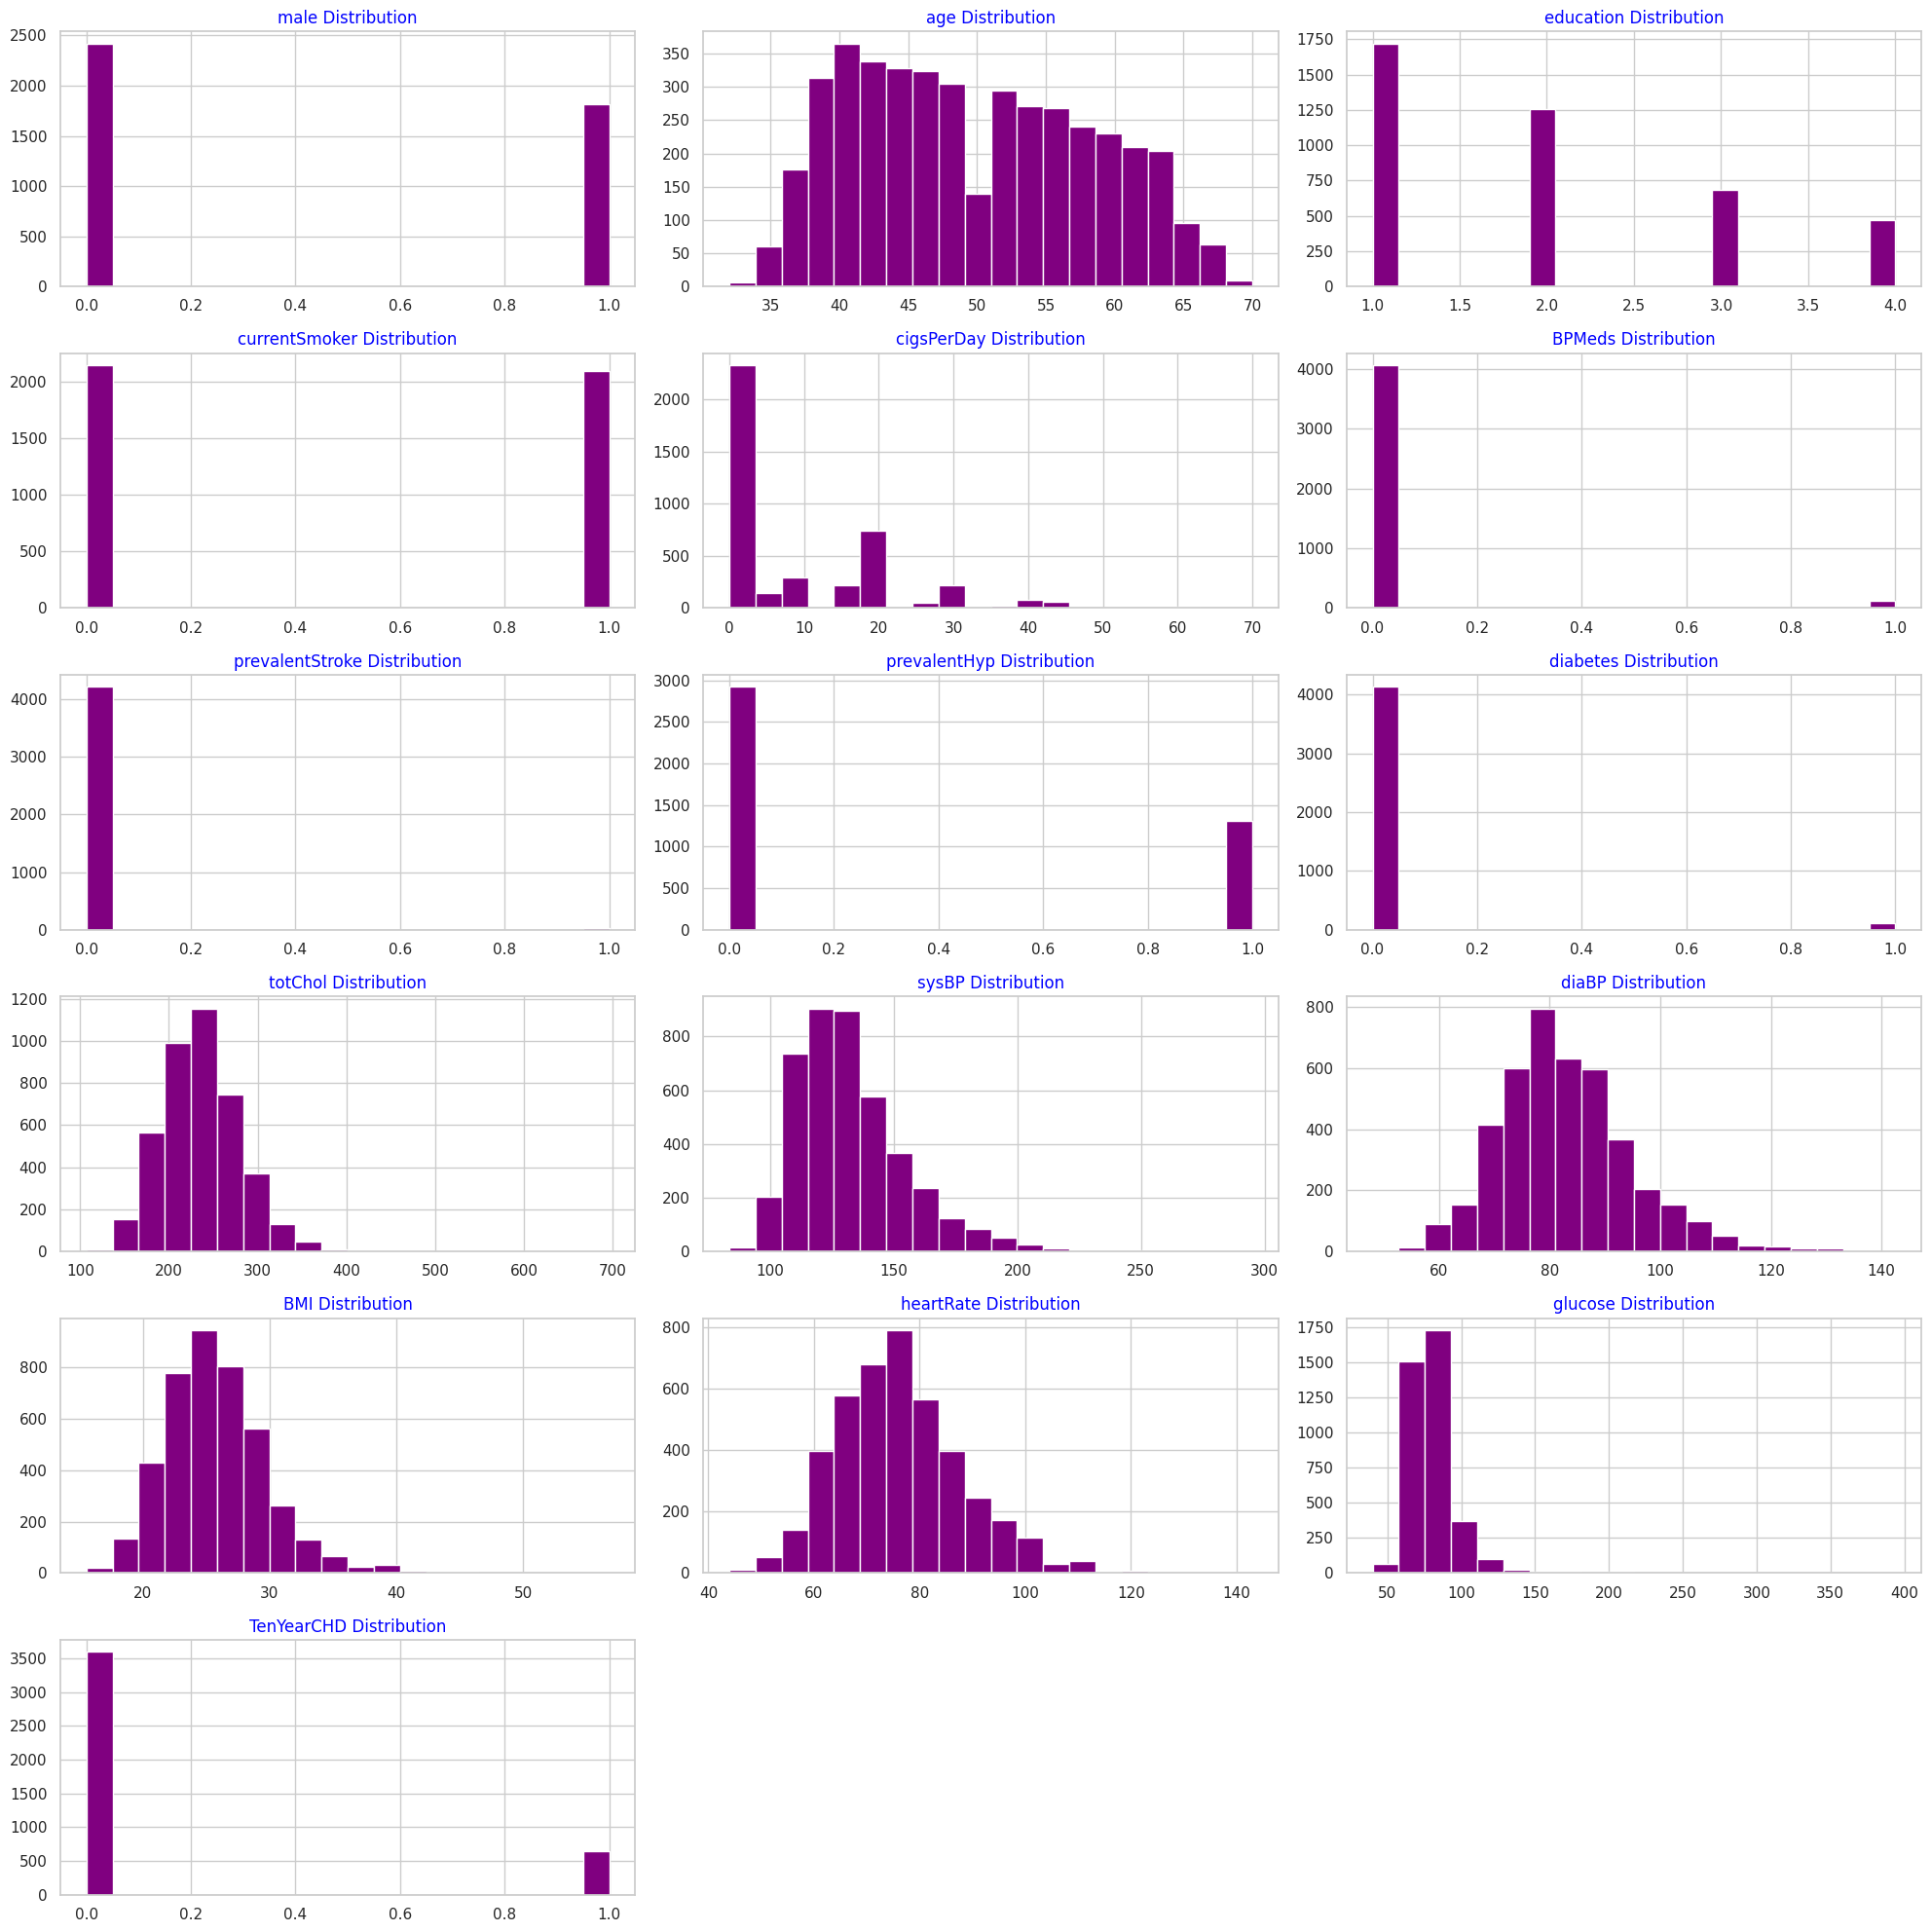

In [141]:
features = ['age','prevalentHyp','sysBP','diaBP','glucose']
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='purple')
        ax.set_title(feature+" Distribution",color='blue')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(dataset,dataset.columns,6,3)

In [142]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


*Categorical Features:

1. male (binary categorical)
2. education (ordinal or categorical)
3. currentSmoker (binary categorical)
4. BPMeds (binary categorical)
5. prevalentStroke (binary categorical)
6. prevalentHyp (binary categorical)
7. diabetes (binary categorical)
8. TenYearCHD (binary outcome)

*Continuous Features:

1. age
2. cigsPerDay
3. totChol
4. sysBP
5. diaBP
6. BMI
7. heartRate
8. glucose

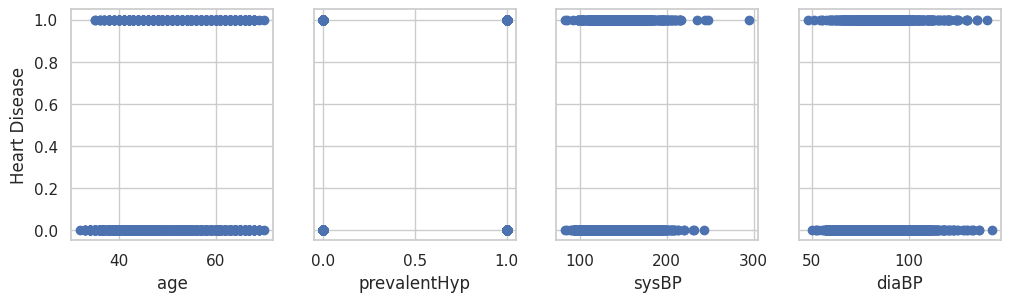

In [143]:
fig,ax=plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(dataset[features[i]],dataset['TenYearCHD'])
    ax[i].set_xlabel(features[i])
ax[0].set_ylabel("Heart Disease")
plt.show()

In [144]:
dk = dataset[dataset.prevalentHyp==0]
bmi_group0 = [0 if dk.BMI.iloc[i] <= 18.5 else 1 if 18.5<=dk.BMI.iloc[i] <=24.9 else 2 if 25.0<= dk.BMI.iloc[i]<=29.9 else 3 for i in range(len(dk))]
dj = dataset[dataset.prevalentHyp==1]
bmi_group1 = [0 if dj.BMI.iloc[i] <= 18.5 else 1 if 18.5<=dj.BMI.iloc[i] <=24.9 else 2 if 25.0<= dj.BMI.iloc[i]<=29.9 else 3 for i in range(len(dj))]


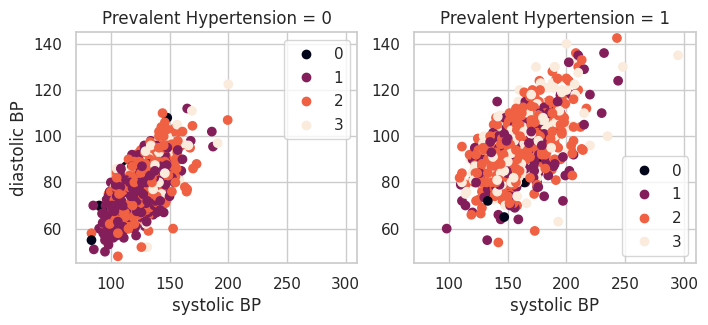

In [145]:
fig,axs = plt.subplots(1,2,figsize=(8,3))
sc0 = axs[0].scatter(dataset.sysBP[dataset.prevalentHyp==0],dataset.diaBP[dataset.prevalentHyp==0],c=bmi_group0)
axs[0].set_xlim(70,310)
axs[0].set_ylim(45,145)
axs[0].set_title("Prevalent Hypertension = 0")
axs[0].set_xlabel("systolic BP")
axs[0].set_ylabel("diastolic BP")

axs[0].legend(*sc0.legend_elements())

sc1 = axs[1].scatter(dataset.sysBP[dataset.prevalentHyp==1],dataset.diaBP[dataset.prevalentHyp==1],c=bmi_group1)
axs[1].set_xlim(70,310)
axs[1].set_ylim(45,145)
axs[1].set_title("Prevalent Hypertension = 1")
axs[1].set_xlabel("systolic BP")

axs[1].legend(*sc1.legend_elements())

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

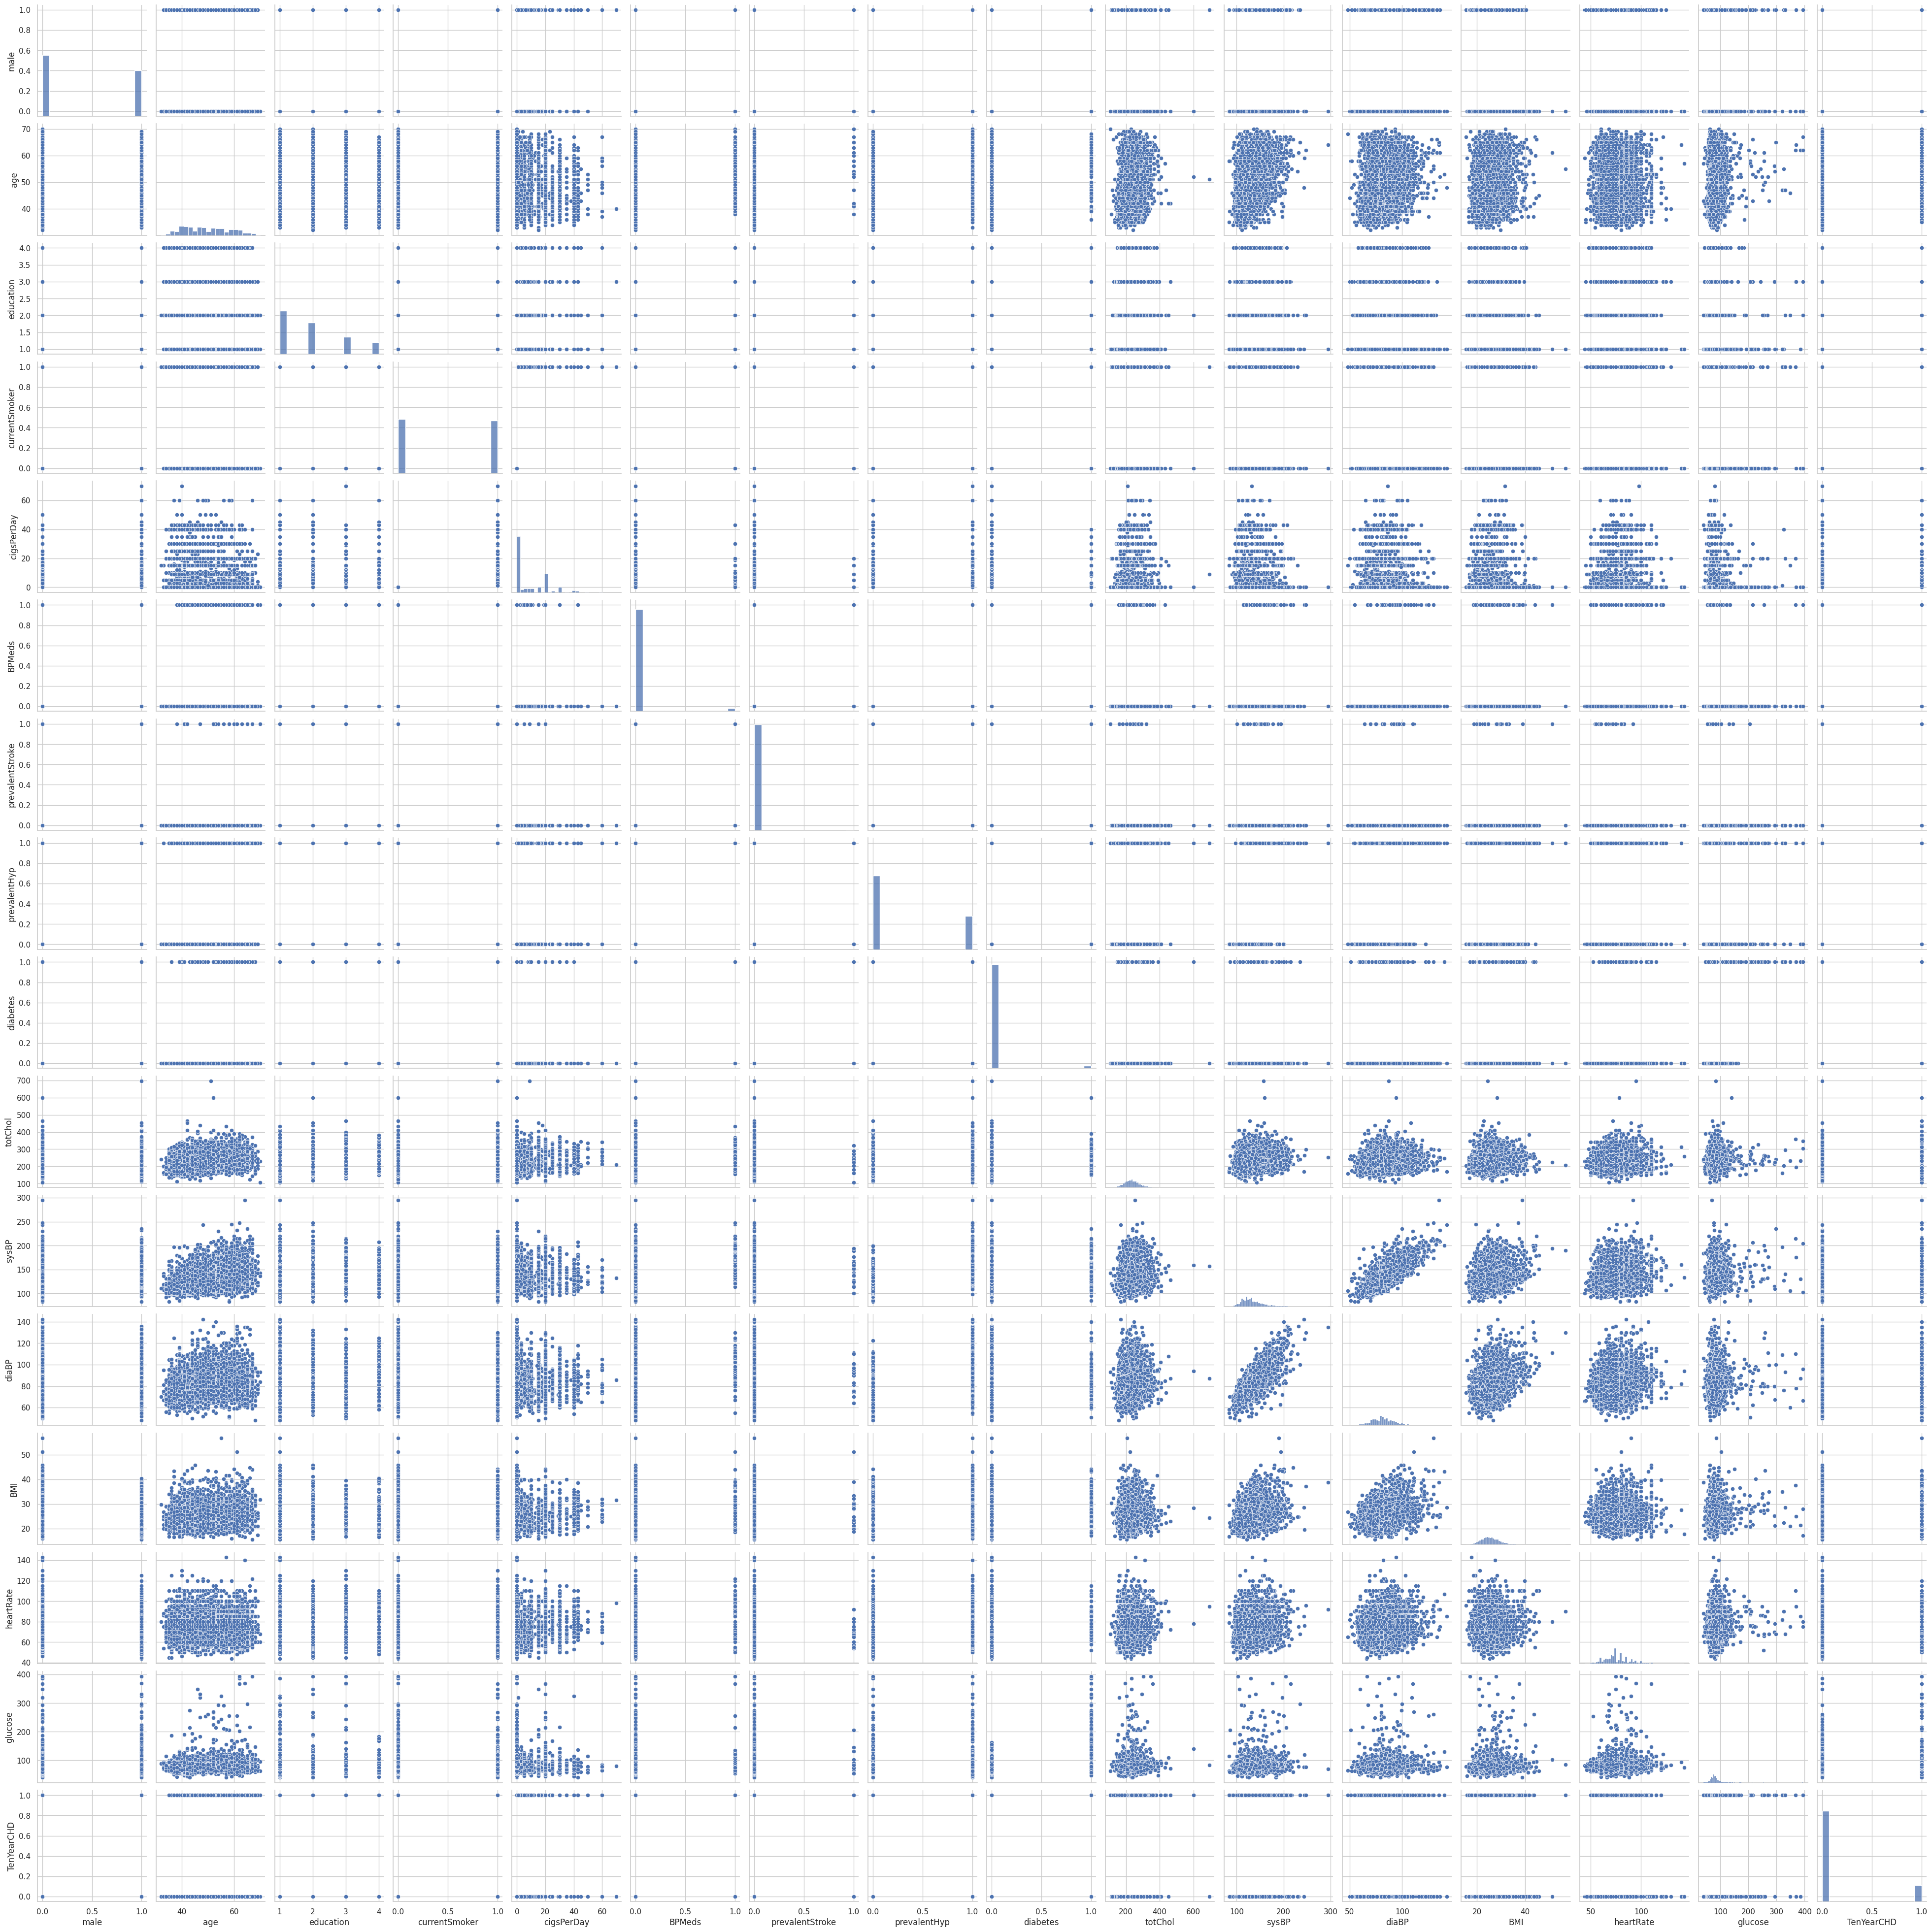

In [146]:
sn.pairplot(data=dataset)

**Handling the missing values in glucose **
since the diabetes feature has a greatest scale in correlation matrix that is estimated by 0.62, we are going to split data by diabetes group and impute by mean or median for each category of diabete

In [147]:
mean_of_glucose = [dataset[dataset.diabetes == 0]['glucose'].mean(),dataset[dataset.diabetes == 1]['glucose'].mean()]
median_of_glucose = [dataset[dataset.diabetes == 0]['glucose'].median(),dataset[dataset.diabetes == 1]['glucose'].median()]
summary_table = pd.DataFrame({
    'Stat': ['Mean', 'Median'],
    'No Diabetes': [mean_of_glucose[0], median_of_glucose[0]],
    'Diabetes': [mean_of_glucose[1], median_of_glucose[1]]
})
print(summary_table)

     Stat  No Diabetes    Diabetes
0    Mean    79.489186  170.333333
1  Median    78.000000  145.000000


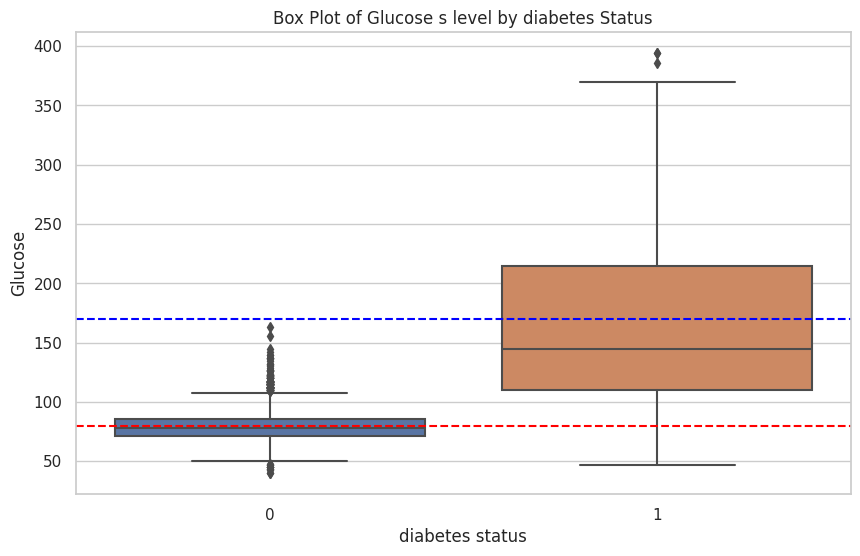

In [148]:
plt.figure(figsize=(10,6))
sn.boxplot(x='diabetes', y='glucose', data=dataset)
plt.xlabel('diabetes status')
plt.ylabel('Glucose')
plt.title('Box Plot of Glucose s level by diabetes Status')
plt.axhline(mean_of_glucose[0],color='red',linestyle='--',label=f'Mean (No Diabetes): {mean_of_glucose[0]:.1f}')
plt.axhline(mean_of_glucose[1],color='blue',linestyle='--',label=f'Mean ( Diabetes): {mean_of_glucose[1]:.1f}')
#plt.axhline(median_of_glucose[0],color='red',linestyle='-',label=f'Mean (No Diabetes): {median_of_glucose[0]:.1f}')
#plt.axhline(median_of_glucose[1],color='blue',linestyle='-',label=f'Mean ( Diabetes): {median_of_glucose[1]:.1f}')
plt.show()

In [149]:
#Imputing null values in glucose column by the median 
dataset.loc[(dataset['glucose'].isnull()) & (dataset['diabetes'] == 1), 'glucose'] = median_of_glucose[1]
dataset.loc[(dataset['glucose'].isnull()) & (dataset['diabetes'] == 0), 'glucose'] = median_of_glucose[0]
print(dataset['glucose'])

0        77.0
1        76.0
2        70.0
3       103.0
4        85.0
        ...  
4233     86.0
4234     68.0
4235     86.0
4236     78.0
4237    107.0
Name: glucose, Length: 4238, dtype: float64


**Handling missing values in the BMI column** , since it has a mutual high correlation values estimated of 0.3 and above with the features prevalentHyp, sysBP and diaBP

In [150]:
dataset['diaBP']

0       70.0
1       81.0
2       80.0
3       95.0
4       84.0
        ... 
4233    92.0
4234    80.0
4235    72.0
4236    87.0
4237    83.0
Name: diaBP, Length: 4238, dtype: float64

In [151]:
#We gonna use three methods in  imputing the bmi column since it has a high correlation with three features 
#K-Nearest Neighbors (KNN Imputation)
#Before visualizing the Bmi distribution depending on the two most high correlated features
#Categorize sysBP and diaBP using pd.cut()
sysBP_bins = [0, 120, 140, 160, 180, 200, float("inf")]
sysBP_labels = ['<=120','121-140', '141-160', '161-180', '181-200', '>200']
dataset['sysBP_cat'] = pd.cut(dataset['sysBP'],bins=sysBP_bins,labels=sysBP_labels)

diaBP_bins = [0, 80, 90, 100, 110, 120, float('inf')]
diaBP_labels = ['<=80', '81-90', '91-100', '101-110', '111-120', '>120']
dataset['diaBP_cat'] = pd.cut(dataset['diaBP'],bins=diaBP_bins,labels=diaBP_labels)



In [152]:
print(dataset[['sysBP','sysBP_cat','diaBP','diaBP_cat']].head())

   sysBP sysBP_cat  diaBP diaBP_cat
0  106.0     <=120   70.0      <=80
1  121.0   121-140   81.0     81-90
2  127.5   121-140   80.0      <=80
3  150.0   141-160   95.0    91-100
4  130.0   121-140   84.0     81-90


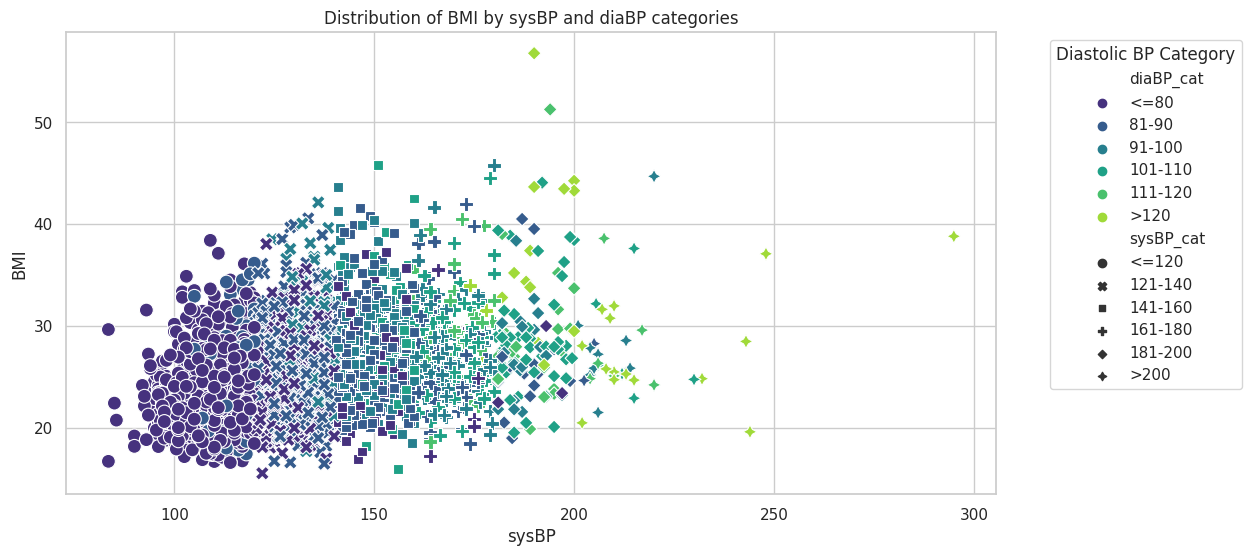

In [153]:
plt.figure(figsize=(12, 6))
sn.scatterplot(x='sysBP', y='BMI', hue='diaBP_cat', style='sysBP_cat',data=dataset, palette='viridis',s=100)
plt.title('Distribution of BMI by sysBP and diaBP categories')
plt.xlabel('sysBP')
plt.ylabel('BMI')
plt.legend(title='Diastolic BP Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

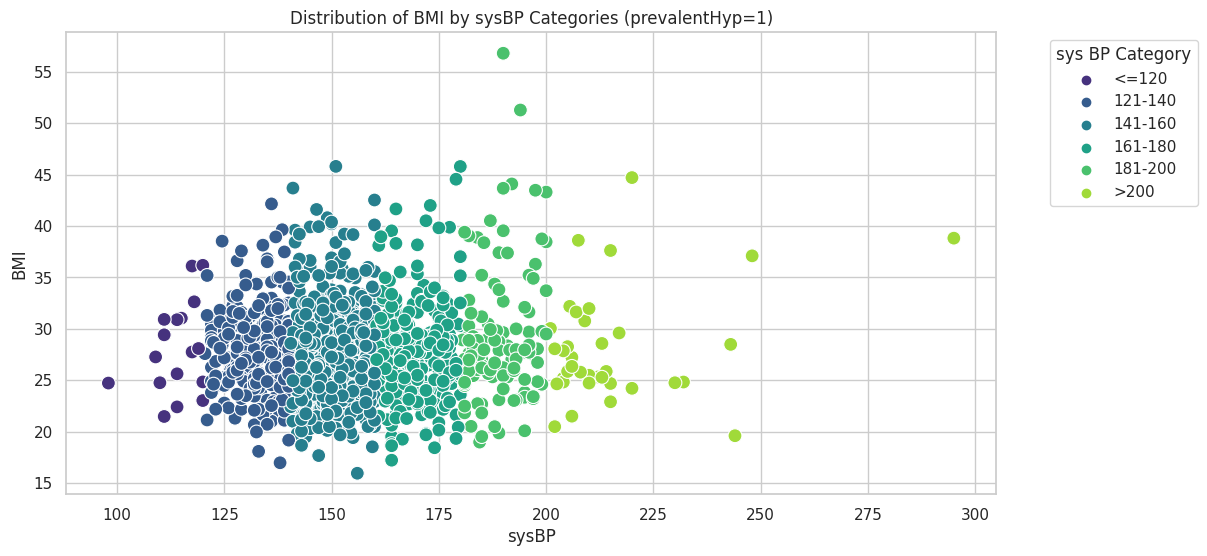

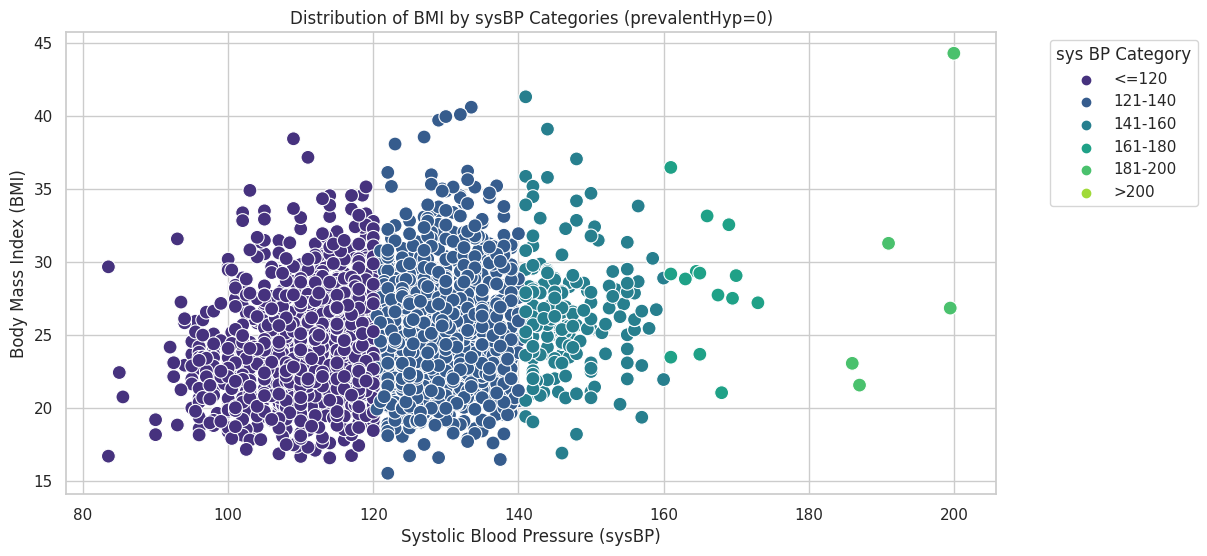

In [154]:
data_prevalentHyp_1 = dataset[dataset['prevalentHyp'] == 1]
data_prevalentHyp_0 = dataset[dataset['prevalentHyp'] == 0]
#Visualize the distribution of BMI by sysBP for prevalentHyp == 1
plt.figure(figsize=(12, 6))
sn.scatterplot(x='sysBP', y='BMI', hue='sysBP_cat', data=data_prevalentHyp_1, palette='viridis',s=100)
plt.title('Distribution of BMI by sysBP Categories (prevalentHyp=1)')
plt.xlabel('sysBP')
plt.ylabel('BMI')
plt.legend(title='sys BP Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#Visualize the distribution of BMI  by sysBP for prevalentHyp == 0
plt.figure(figsize=(12, 6))
sn.scatterplot(x='sysBP', y='BMI', hue='sysBP_cat', data=data_prevalentHyp_0, palette='viridis',s=100)
plt.title('Distribution of BMI by sysBP Categories (prevalentHyp=0)')
plt.xlabel('Systolic Blood Pressure (sysBP)')
plt.ylabel('Body Mass Index (BMI)')
plt.legend(title='sys BP Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

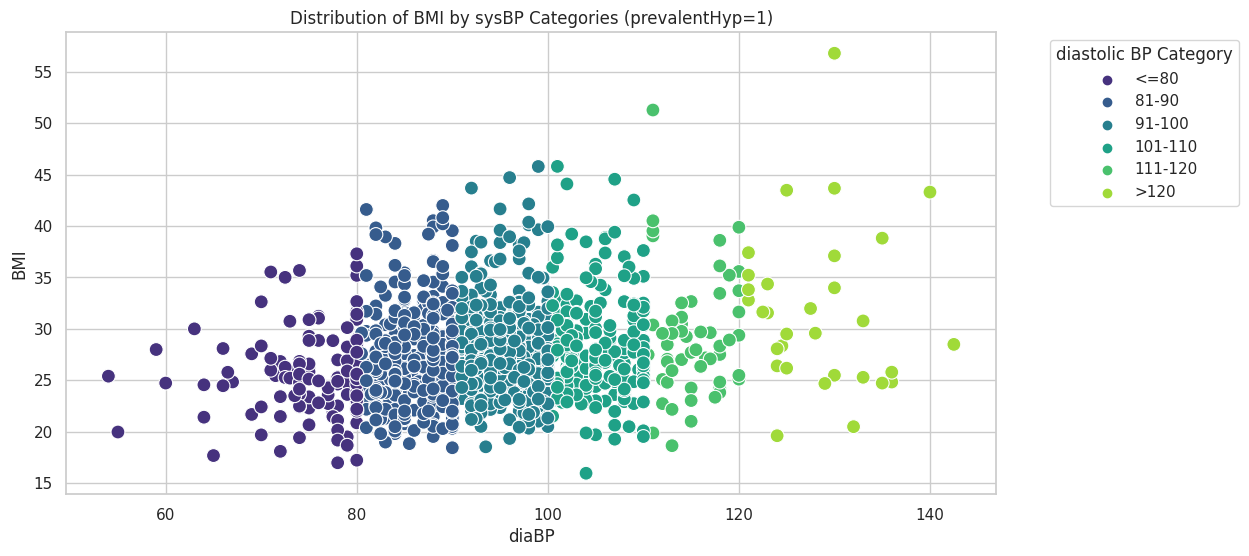

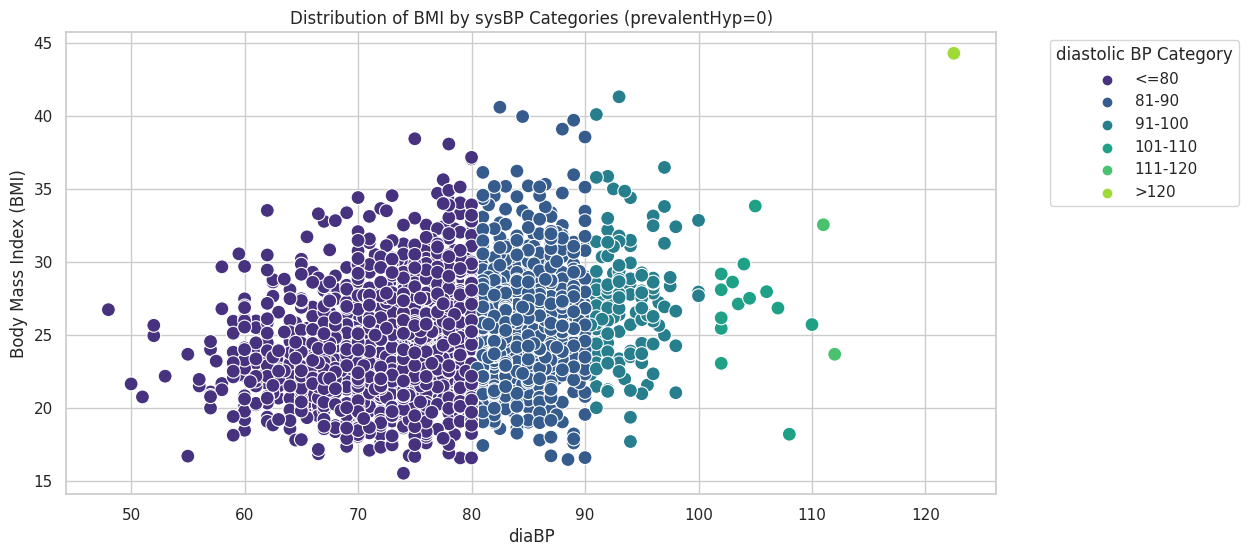

In [155]:
#Visualize the distribution of BMI by diaBP for prevalentHyp == 1
plt.figure(figsize=(12, 6))
sn.scatterplot(x='diaBP', y='BMI', hue='diaBP_cat', data=data_prevalentHyp_1, palette='viridis',s=100)
plt.title('Distribution of BMI by sysBP Categories (prevalentHyp=1)')
plt.xlabel('diaBP')
plt.ylabel('BMI')
plt.legend(title='diastolic BP Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#Visualize the distribution of BMI  by diaBP for prevalentHyp == 0
plt.figure(figsize=(12, 6))
sn.scatterplot(x='diaBP', y='BMI', hue='diaBP_cat', data=data_prevalentHyp_0, palette='viridis',s=100)
plt.title('Distribution of BMI by sysBP Categories (prevalentHyp=0)')
plt.xlabel('diaBP')
plt.ylabel('Body Mass Index (BMI)')
plt.legend(title='diastolic BP Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [156]:
dataset1 = dataset.copy()
dataset2 = dataset.copy()

In [157]:
#KNN IMPUTATION
imputer = KNNImputer(n_neighbors=3)
impute_df = dataset1[['sysBP','diaBP','prevalentHyp']]
imputed_data = imputer.fit_transform(impute_df)
dataset1['BMI'] = imputed_data[:, 0]
print(dataset1['BMI'].isnull().sum()) 

0


In [158]:
#Manipulating the second database to fill the missing values by regression multiple 
# Regression Multiple Imputation 

features = ['sysBP', 'diaBP', 'prevalentHyp']
train_df = dataset2[dataset2['BMI'].notnull()]
test_df = dataset2[dataset2['BMI'].isnull()]
reg = LinearRegression()
reg.fit(train_df[features],train_df['BMI'])
predicted_values = reg.predict(test_df[features])
#FILL THE MISSING VALUES WITH THE PREDICTED VALUES 
dataset2.loc[dataset2['BMI'].isnull(), 'BMI'] = predicted_values
#check if there's any missing values 
print(dataset2['BMI'].isnull().sum())



0


In [159]:
print(dataset['BMI'].isnull().sum())

19


In [160]:
dataset3 = dataset.copy()
train_data = dataset3.dropna(subset=['sysBP', 'BMI'])

X_train = train_data[['sysBP']]
y_train = train_data['BMI']
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the missing values in BMI
missing_data = dataset3[dataset3['BMI'].isna()]
X_missing = missing_data[['sysBP']]
predicted_BMI = model.predict(X_missing)

# Impute the missing values
dataset3.loc[dataset3['BMI'].isna(), 'BMI'] = predicted_BMI
print(dataset3['BMI'])


0       26.97
1       28.73
2       25.34
3       28.58
4       23.10
        ...  
4233    25.97
4234    19.71
4235    22.00
4236    19.16
4237    21.47
Name: BMI, Length: 4238, dtype: float64


	 Mean BMI for prevalentHyp=0: 25			 Mean BMI for prevalentHyp=1: 28


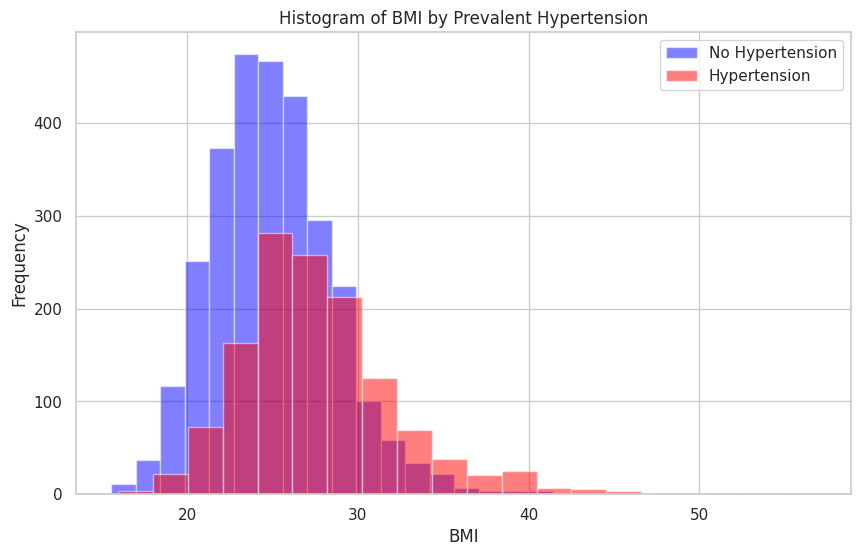

In [161]:
bmi_mean = [dataset[dataset.prevalentHyp == 0]['BMI'].mean(),dataset[dataset.prevalentHyp == 1]['BMI'].mean()]

print(f"\t Mean BMI for prevalentHyp=0: {bmi_mean[0]:.0f}", end="\t")
print(f"\t\t Mean BMI for prevalentHyp=1: {bmi_mean[1]:.0f}")


plt.figure(figsize=(10,6))
plt.hist(dataset[dataset['prevalentHyp'] == 0]['BMI'], bins=20, alpha=0.5, label='No Hypertension', color='blue')
plt.hist(dataset[dataset['prevalentHyp'] == 1]['BMI'], bins=20, alpha=0.5, label='Hypertension', color='red')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Histogram of BMI by Prevalent Hypertension')
plt.legend()
plt.grid(True)
plt.show()

In [162]:
dataset.loc[(dataset.BMI.isnull())&(dataset.prevalentHyp==0),['BMI']] = bmi_mean[0]
dataset.loc[(dataset.BMI.isnull())&(dataset.prevalentHyp==1),['BMI']] = bmi_mean[1]
print(dataset['BMI'].isnull().sum())

0


**Handling the missing values in the column of cigsPerDay**, since its related to the feautre of current smoker, if the person is a current smoker then his cigsPerDay should be equal to average cigs per day and if the person is not the cigs per day should be null

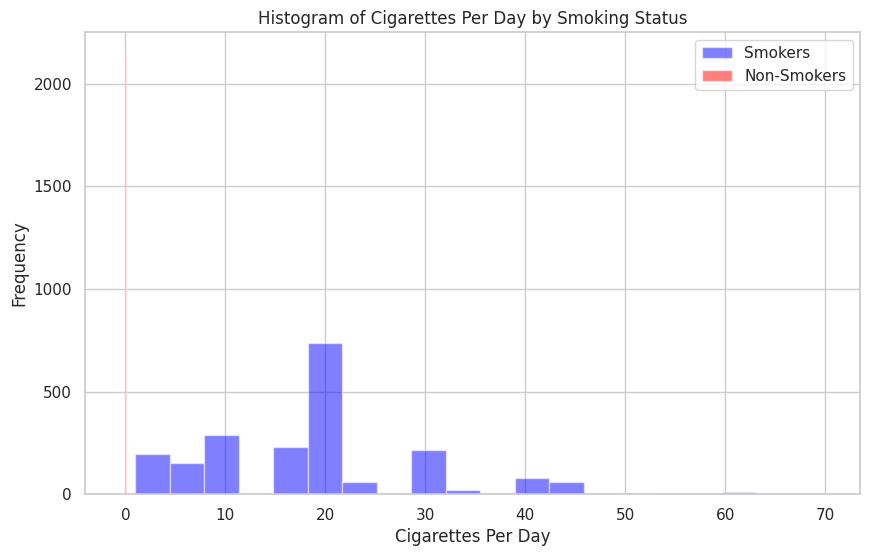

In [163]:
plt.figure(figsize=(10, 6))
plt.hist(dataset[dataset['currentSmoker'] == 1]['cigsPerDay'], bins=20, alpha=0.5, label='Smokers', color='blue')
plt.hist(dataset[dataset['currentSmoker']==0]['cigsPerDay'], bins=20, alpha=0.5, label='Non-Smokers', color='red')
plt.xlabel('Cigarettes Per Day')
plt.ylabel('Frequency')
plt.title('Histogram of Cigarettes Per Day by Smoking Status')
plt.legend()
plt.grid(True)
plt.show()

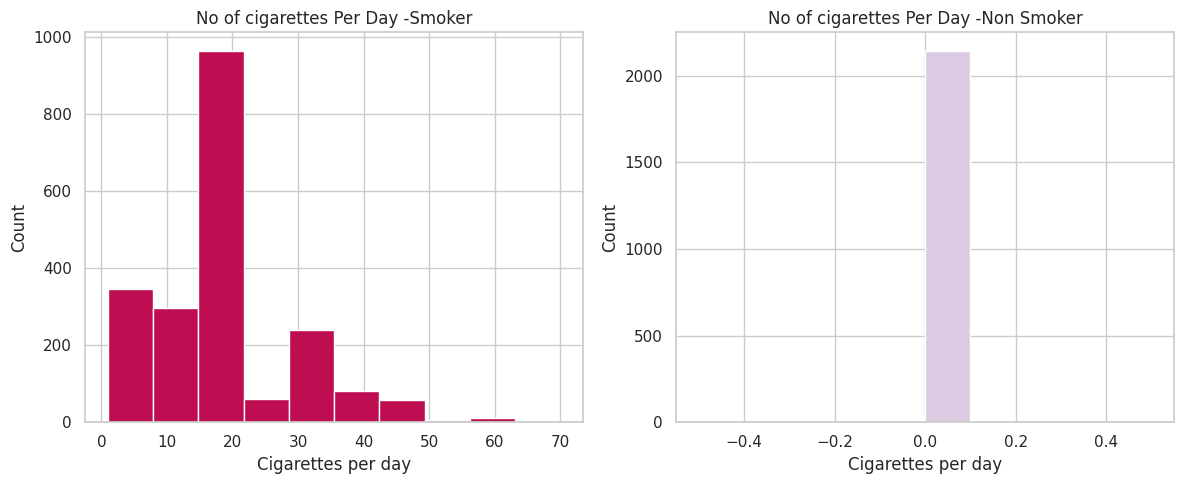

currentSmoker
0     0
1    29
Name: cigsPerDay, dtype: int64


In [164]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].hist(dataset[dataset.currentSmoker == 1].cigsPerDay, density=False, color=plt.cm.PuRd(200))
axs[0].set_title('No of cigarettes Per Day -Smoker')
axs[0].set_xlabel('Cigarettes per day')
axs[0].set_ylabel('Count')

axs[1].hist(dataset[dataset.currentSmoker == 0].cigsPerDay, density=False, color=plt.cm.PuRd(50))
axs[1].set_title('No of cigarettes Per Day -Non Smoker')
axs[1].set_xlabel('Cigarettes per day')
axs[1].set_ylabel('Count')
plt.tight_layout()
plt.show()
print(dataset.cigsPerDay.isnull().groupby(by=dataset.currentSmoker).sum())

In [165]:
dataset.loc[(dataset.cigsPerDay.isnull())&(dataset.currentSmoker==1),['cigsPerDay']] = round(dataset[dataset.currentSmoker==1].cigsPerDay.mean())
print(dataset['cigsPerDay'].isnull().sum())
dataset1.loc[(dataset1.cigsPerDay.isnull())&(dataset1.currentSmoker==1),['cigsPerDay']] = round(dataset1[dataset1.currentSmoker==1].cigsPerDay.mean())
dataset2.loc[(dataset2.cigsPerDay.isnull())&(dataset2.currentSmoker==1),['cigsPerDay']] = round(dataset2[dataset2.currentSmoker==1].cigsPerDay.mean())
dataset3.loc[(dataset3.cigsPerDay.isnull())&(dataset3.currentSmoker==1),['cigsPerDay']] = round(dataset3[dataset3.currentSmoker==1].cigsPerDay.mean())

0


In [166]:
print(dataset.isna().sum())

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay           0
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                  0
heartRate            1
glucose              0
TenYearCHD           0
sysBP_cat            0
diaBP_cat            0
dtype: int64


**Totchol** has a high correlated feature with age of 0.26 ,prevalentHyp, sysBP, diaBP and BMI , so we can impute the missing values by the mean or regression multiple since we have a lot of high correlated features, or based on which group we can impute

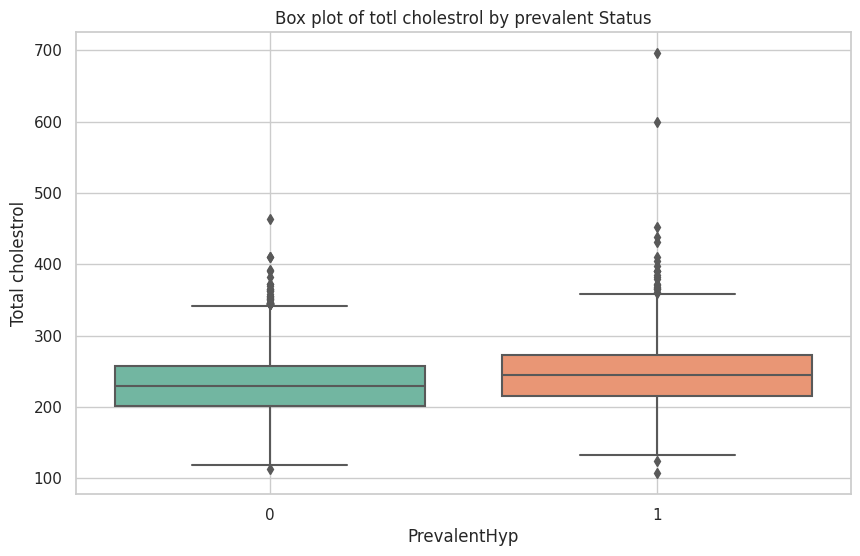

In [167]:
sn.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sn.boxplot(x='prevalentHyp',y='totChol', data=dataset, palette="Set2")
plt.xlabel('PrevalentHyp')
plt.ylabel('Total cholestrol')
plt.title('Box plot of totl cholestrol by prevalent Status')
plt.grid(True)
plt.show()

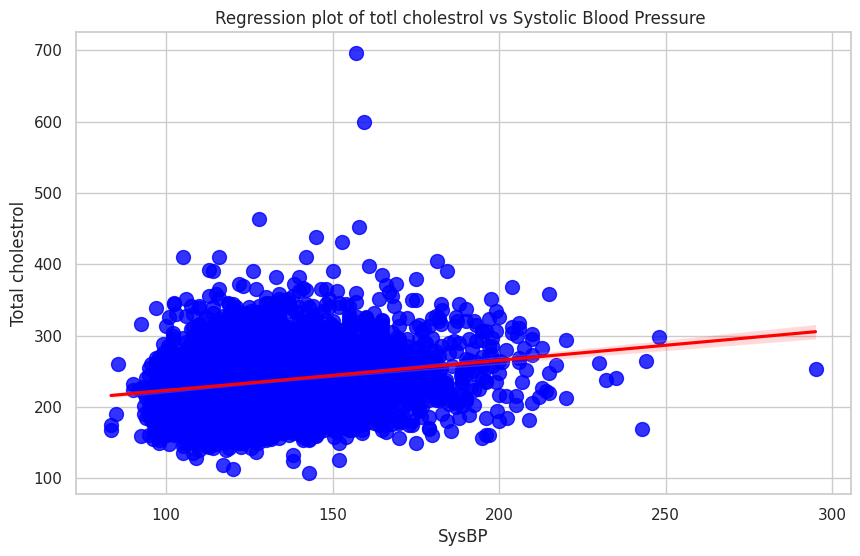

In [168]:
sn.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sn.regplot(x='sysBP', y='totChol', data=dataset, scatter_kws={'color':'blue', 's': 100},line_kws={'color':'red'})
plt.xlabel('SysBP')
plt.ylabel('Total cholestrol')
plt.title('Regression plot of totl cholestrol vs Systolic Blood Pressure ')
plt.grid(True)
plt.show()
#there is slight visible trend between the two features 

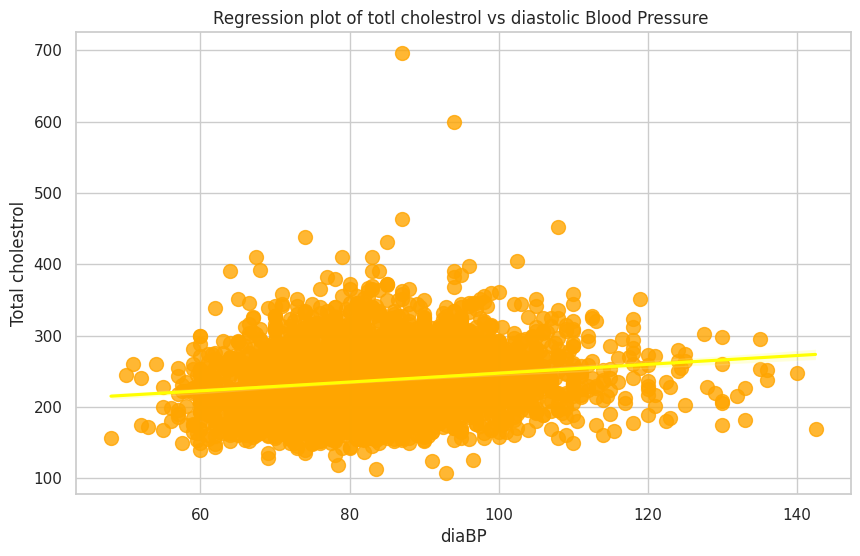

In [169]:
sn.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sn.regplot(x='diaBP', y='totChol', data=dataset, scatter_kws={'color':'orange', 's': 100},line_kws={'color':'yellow'})
plt.xlabel('diaBP')
plt.ylabel('Total cholestrol')
plt.title('Regression plot of totl cholestrol vs diastolic Blood Pressure ')
plt.grid(True)
plt.show()
#the diaBP is associated more with the totchol and its not pattern data
#we can remark that there is a visible trend 

In [170]:
sysBP_median = dataset.groupby('sysBP_cat')['totChol'].median()
print(sysBP_median)

sysBP_cat
<=120      222.0
121-140    235.0
141-160    243.0
161-180    244.0
181-200    252.0
>200       262.0
Name: totChol, dtype: float64


/tmp/ipykernel_33/2654489619.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sysBP_median = dataset.groupby('sysBP_cat')['totChol'].median()


/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


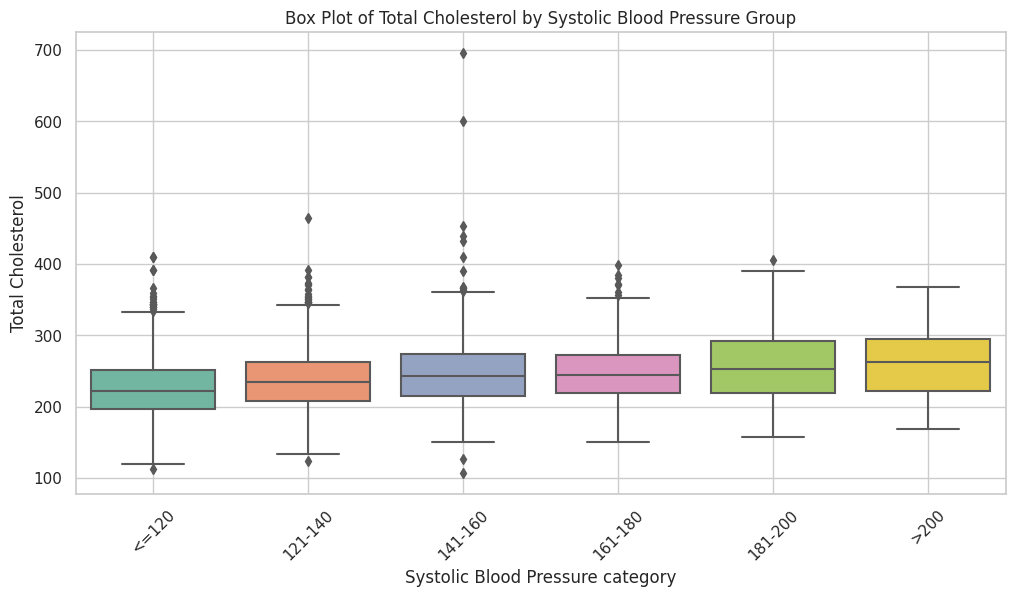

In [171]:
# Visualization of Total Cholesterol by sysBP group
plt.figure(figsize=(12, 6))
sn.boxplot(x='sysBP_cat', y='totChol', data=dataset, palette="Set2")
plt.xlabel('Systolic Blood Pressure category')
plt.ylabel('Total Cholesterol')
plt.title('Box Plot of Total Cholesterol by Systolic Blood Pressure Group')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

In [172]:
#we ll observe by age categorises 
bins = [0, 30, 40, 50, 60, 70, float('inf')]
labels = ['Under 30', '30-39', '40-49', '50-59', '60-69', '70 and above']
dataset['age_group'] = pd.cut(dataset['age'], bins=bins, labels=labels, right=False)
age_median = dataset.groupby('age_group')['totChol'].median()
print("Median totChol by age group :\n",age_median)

Median totChol by age group :
 age_group
Under 30          NaN
30-39           210.0
40-49           228.0
50-59           243.0
60-69           246.0
70 and above    169.0
Name: totChol, dtype: float64


/tmp/ipykernel_33/2617645390.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_median = dataset.groupby('age_group')['totChol'].median()


In [173]:
#we have two choices wither we can impute null values in the cholestrol column
#based on age groups or sysBP group , the age has the most high correlated feature\
dataset.loc[dataset.totChol.isnull(),['totChol']]= dataset.loc[dataset.totChol.isnull(),"age_group"].apply(lambda c: age_median[c])

In [178]:
#we ll observe by age categorises 
bins = [0, 30, 40, 50, 60, 70, float('inf')]
labels = ['Under 30', '30-39', '40-49', '50-59', '60-69', '70 and above']
dataset3['age_group'] = pd.cut(dataset3['age'], bins=bins, labels=labels, right=False)
age_median = dataset3.groupby('age_group')['totChol'].median()
print("Median totChol by age group :\n",age_median)

Median totChol by age group :
 age_group
Under 30          NaN
30-39           210.0
40-49           228.0
50-59           243.0
60-69           246.0
70 and above    169.0
Name: totChol, dtype: float64


/tmp/ipykernel_33/2508563187.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_median = dataset3.groupby('age_group')['totChol'].median()


In [179]:
#Applying for the other datasets to compare
dataset3.loc[dataset3.totChol.isnull(),['totChol']]= dataset3.loc[dataset3.totChol.isnull(),"age_group"].apply(lambda c: age_median[c])

**Handling missing values of BPmeds**, corresponding to the correlation matrix we can see that prevalentHyp has a good correlation that can permit us to vizualise the distribution of data samples 

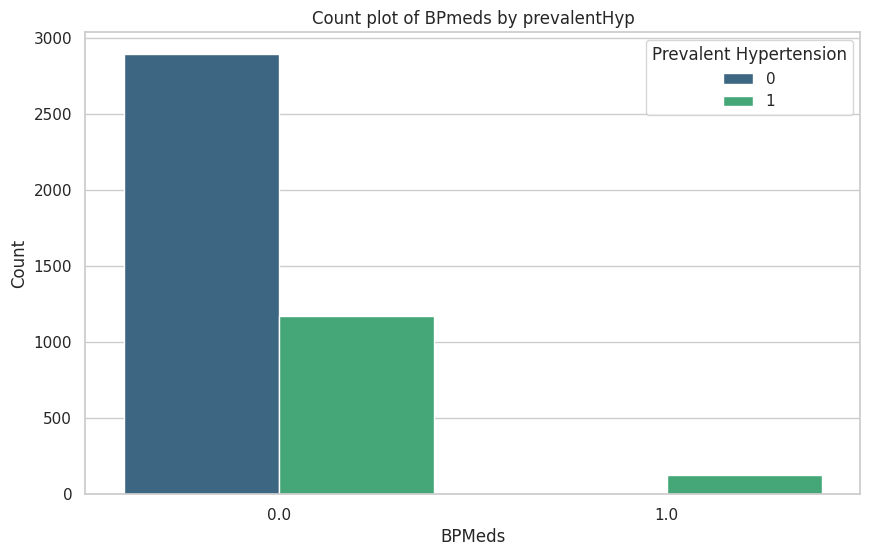

In [180]:
#Bar plot for BPmeds by prevalentHyp 
plt.figure(figsize=(10,6))
sn.countplot(x='BPMeds',hue='prevalentHyp', data=dataset, palette='viridis')
plt.title('Count plot of BPmeds by prevalentHyp')
plt.xlabel('BPMeds')
plt.ylabel('Count')
plt.legend(title='Prevalent Hypertension')
plt.show()

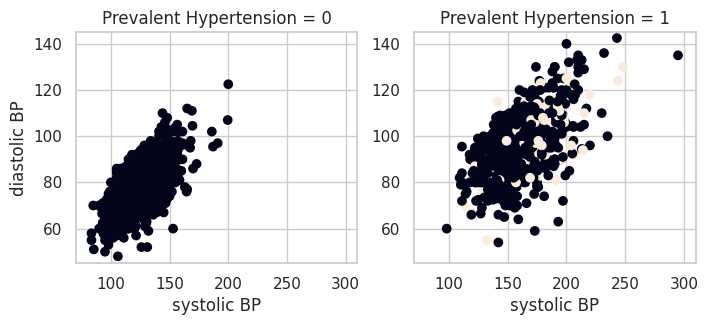

In [181]:
fig,axs = plt.subplots(1,2,figsize=(8,3))
axs[0].scatter(dataset.sysBP[dataset.prevalentHyp==0],dataset.diaBP[dataset.prevalentHyp==0],c=dataset.BPMeds[dataset.prevalentHyp==0])
axs[0].set_xlim(70,310)
axs[0].set_ylim(45,145)
axs[0].set_title("Prevalent Hypertension = 0")
axs[0].set_xlabel("systolic BP")
axs[0].set_ylabel("diastolic BP")


axs[1].scatter(dataset.sysBP[dataset.prevalentHyp==1],dataset.diaBP[dataset.prevalentHyp==1],c=dataset.BPMeds[dataset.prevalentHyp==1])
axs[1].set_xlim(70,310)
axs[1].set_ylim(45,145)
axs[1].set_title("Prevalent Hypertension = 1")
axs[1].set_xlabel("systolic BP")


plt.show()

In [182]:
missing_values_count = dataset[dataset['BPMeds'].isnull()].groupby('prevalentHyp').size()
missing_values_count

prevalentHyp
0    31
1    22
dtype: int64

/tmp/ipykernel_33/1593947425.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sn.swarmplot(x='BPMeds',y='sysBP', data=dataset, palette='viridis')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_g

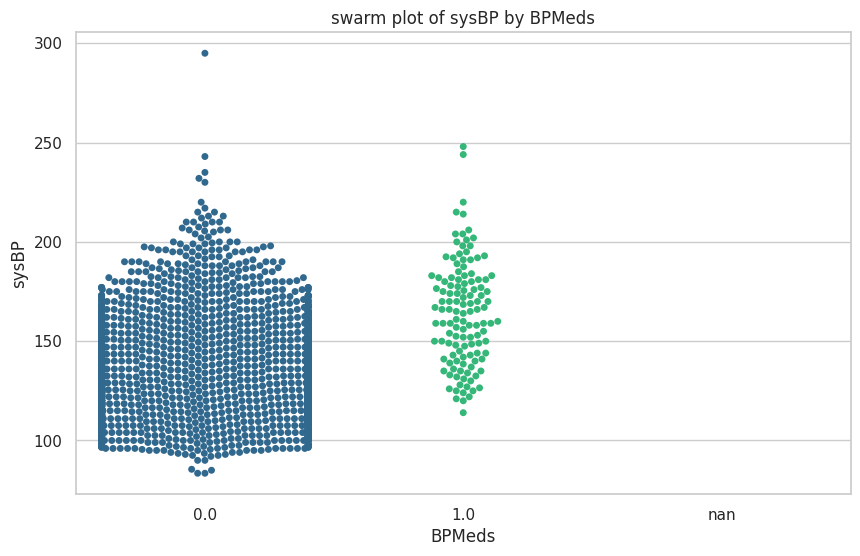

In [183]:
#SWARM plot for BPMeds by sysBP
plt.figure(figsize=(10,6))
sn.swarmplot(x='BPMeds',y='sysBP', data=dataset, palette='viridis')
plt.title('swarm plot of sysBP by BPMeds')
plt.xlabel('BPMeds')
plt.ylabel('sysBP')
plt.show()

Most non-medicated individuals (BPMeds = 0) have systolic blood pressure values concentrated around 100-175, whereas medicated individuals have values concentrated around 120-205.


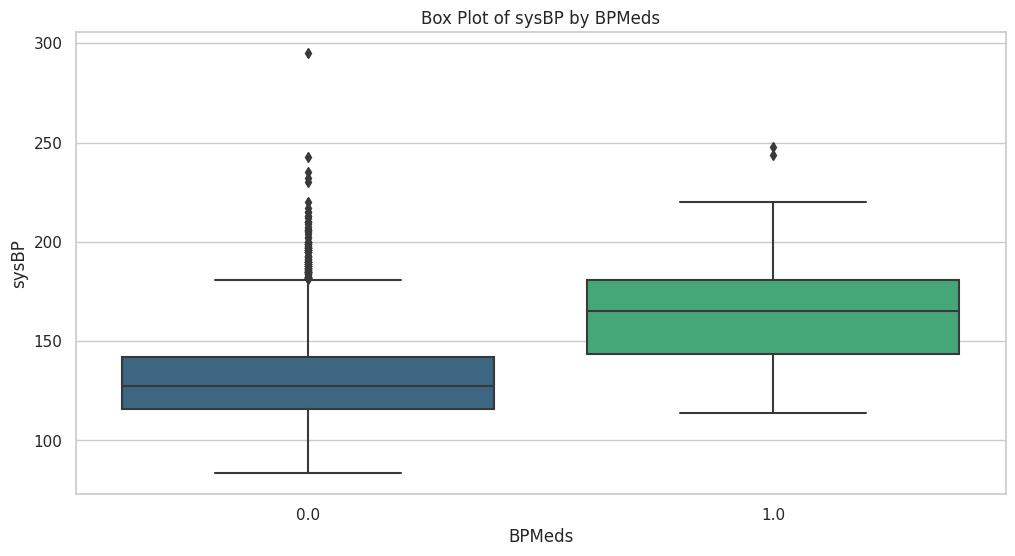

In [184]:
plt.figure(figsize=(12,6))
sn.boxplot(x='BPMeds', y='sysBP', data=dataset, palette='viridis')
plt.title('Box Plot of sysBP by BPMeds')
plt.xlabel('BPMeds')
plt.ylabel('sysBP')
plt.show()

In [185]:
bpmed_0_stats = dataset[dataset['BPMeds'] == 0]['sysBP'].describe(percentiles=[.25, .5, .75])

bpmed_1_stats = dataset[dataset['BPMeds'] == 1]['sysBP'].describe(percentiles=[.25, .5, .75])
print("Statistics for sysBP with BPMeds = 0:")
print(f"Min: {bpmed_0_stats['min']:.2f}")
print(f"25th Percentile (Q1): {bpmed_0_stats['25%']:.2f}")
print(f"Median: {bpmed_0_stats['50%']:.2f}")
print(f"75th Percentile (Q3): {bpmed_0_stats['75%']:.2f}")
print(f"Max: {bpmed_0_stats['max']:.2f}")

print("\nStatistics for sysBP with BPMeds = 1:")
print(f"Min: {bpmed_1_stats['min']:.2f}")
print(f"25th Percentile (Q1): {bpmed_1_stats['25%']:.2f}")
print(f"Median: {bpmed_1_stats['50%']:.2f}")
print(f"75th Percentile (Q3): {bpmed_1_stats['75%']:.2f}")
print(f"Max: {bpmed_1_stats['max']:.2f}")

Statistics for sysBP with BPMeds = 0:
Min: 83.50
25th Percentile (Q1): 116.00
Median: 127.50
75th Percentile (Q3): 142.00
Max: 295.00

Statistics for sysBP with BPMeds = 1:
Min: 114.00
25th Percentile (Q1): 143.75
Median: 165.00
75th Percentile (Q3): 181.00
Max: 248.00


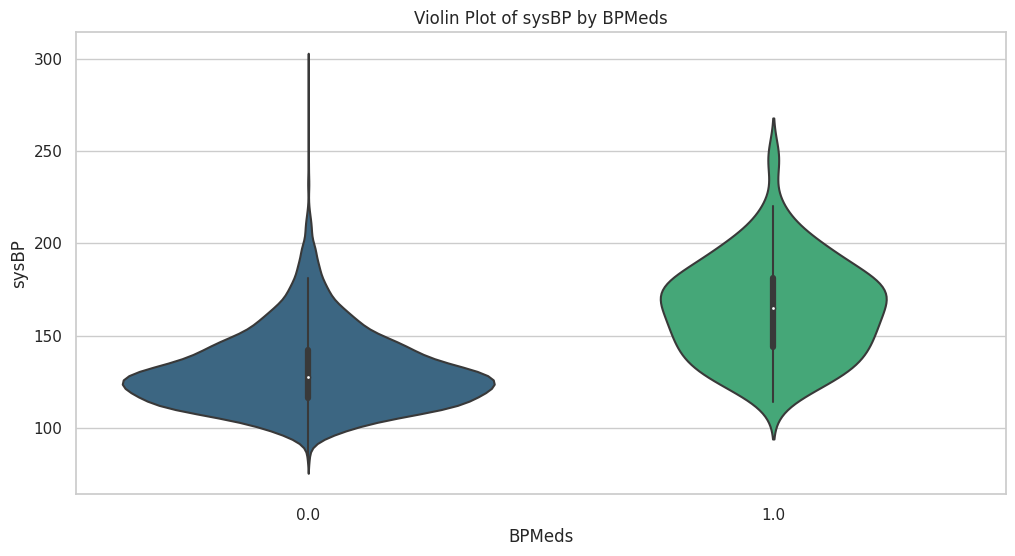

In [186]:
plt.figure(figsize=(12,6))
sn.violinplot(x='BPMeds', y='sysBP', data=dataset, palette='viridis')
plt.title('Violin Plot of sysBP by BPMeds')
plt.xlabel('BPMeds')
plt.ylabel('sysBP')
plt.show()

In [187]:
dataset = dataset[dataset.BPMeds.notnull()]
print(f"Number of rows after dropping: {dataset.shape[0]}")

Number of rows after dropping: 4185


In [188]:
#Drop the null row of Heart Rate
dataset = dataset[dataset.heartRate.notnull()]
print(f"Number of rows after dropping: {dataset.shape[0]}")

Number of rows after dropping: 4184


In [189]:
#predicting the missing values using knn imputation for BPmeds 
# Selecting features related to BPMeds
features = ['sysBP', 'diaBP', 'prevalentHyp', 'BPMeds']
knn_imputer = KNNImputer(n_neighbors=3)
dataset_imputed = knn_imputer.fit_transform(dataset1[features])
dataset1['BPMeds'] = dataset_imputed[:, features.index('BPMeds')]

In [190]:
#using classification to predict the missing values of BPMEDS
features = ['sysBP', 'diaBP', 'prevalentHyp', 'BMI']
train_data = dataset2[dataset2['BPMeds'].notnull()]
test_data = dataset2[dataset2['BPMeds'].isnull()]
X_train = train_data[features]
y_train = train_data['BPMeds']

imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
classifier = RandomForestClassifier()
classifier.fit(X_train_imputed, y_train)

X_test = test_data[features]
X_test_imputed = imputer.transform(X_test)
predicted_bpmeds = classifier.predict(X_test_imputed)

# Filling the missing values in the original dataset
dataset2.loc[dataset2['BPMeds'].isnull(), 'BPMeds'] = predicted_bpmeds


In [191]:
dataset3.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay           0
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            1
glucose              0
TenYearCHD           0
sysBP_cat            0
diaBP_cat            0
age_group            0
dtype: int64

In [192]:

dataset3 = dataset3[dataset3.BPMeds.notnull()]
print(f"Number of rows after dropping: {dataset3.shape[0]}")


Number of rows after dropping: 4185


In [193]:
#Drop the null row of Heart Rate
dataset2 = dataset2[dataset2.heartRate.notnull()]
print(f"Number of rows after dropping: {dataset2.shape[0]}")

Number of rows after dropping: 4237


# **MODEL BUILDING **

1. -Simply we are building the model that is gonna be fitted with the four DATASETS, 
2. -we have taken various multiple data exploration and techniques on the four datasets to compare the impact of each in its own exploration, comparing how th model will preform in each.
3. -Additionally, we will explore the role of data analysis in identifying target labels and making accurate predictions 

In [194]:
dataset = dataset.drop(columns=['sysBP_cat', 'age_group','diaBP_cat'])

In [197]:
dataset3 = dataset3.drop(columns=['sysBP_cat', 'age_group','diaBP_cat'])

In [198]:
dataset1.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [199]:
dataset.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            0
glucose              0
TenYearCHD           0
dtype: int64

In [200]:
X = dataset.drop(columns=['TenYearCHD', 'education'])  # Exclude 'TenYearCHD' and 'education'
y = dataset['TenYearCHD']                             # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# verifying the shape of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3347, 14)
X_test shape: (837, 14)
y_train shape: (3347,)
y_test shape: (837,)


In [201]:
print("First five elements in X_train are:\n", X_train[:5])
print("Type of X_train:",type(X_train))

First five elements in X_train are:
       male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
2214     0   53              0         0.0     0.0                0   
827      1   68              1        10.0     0.0                0   
2260     0   45              1         5.0     0.0                0   
1203     1   64              1        30.0     0.0                0   
786      1   45              0         0.0     1.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  
2214             1         0    243.0  188.5  106.5  29.82       68.0     70.0  
827              0         0    261.0  122.0   70.0  26.37       96.0     60.0  
2260             0         0    268.0  100.0   70.0  23.45       73.0     87.0  
1203             1         0    253.0  178.0  106.0  24.68      100.0     76.0  
786              1         0    258.0  126.0   82.0  27.18       72.0     70.0  
Type of X_train: <class 'pandas.core.frame.DataFra

In [202]:
print("First five elements in y_train are:\n", y_train[:5])
print("Type of y_train:",type(y_train))

First five elements in y_train are:
 2214    0
827     0
2260    0
1203    1
786     0
Name: TenYearCHD, dtype: int64
Type of y_train: <class 'pandas.core.series.Series'>


Our goal is to build a logistic regression model to fit this data.

With this model, you can then predict if a new patient will have a heart disease  based on their medical infos.

# LOGISTIC REGRESSION , SIGMOID FUNCTION

Recall that for logistic regression, the model is represented as
**𝑓𝐰,𝑏(𝑥)=𝑔(𝐰⋅𝐱+𝑏)**
 
where function 𝑔 is the sigmoid function. The sigmoid function is defined as:

**𝑔(𝑧)=1/(1+𝑒−𝑧)****

In [203]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z
         
    """ 
    g = 1 /(1+np.exp(-z))
   
    return g

In [204]:
value = 0

print (f"sigmoid({value}) = {sigmoid(value)}")

sigmoid(0) = 0.5


# Cost Function (Log-Loss)
The cost function for logistic regression is the binary cross-entropy loss.
It is of the next form :

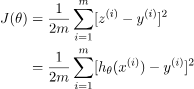


or 

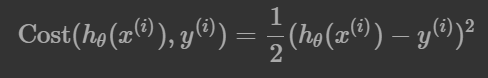

In words, a function Cost
 that takes two parameters in input: hθ(x(i))
 as hypothesis function and y(i)
 as output. You can think of it as the cost the algorithm has to pay if it makes a prediction hθ(x(i))
 while the actual label was y(i)


for more optimizations :

1. 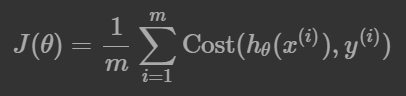
 
2. 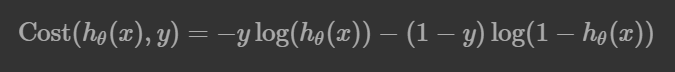

In [205]:
def compute_cost(X, y, weights, bias):
    m = X.shape[0] 
    z = np.dot(X, weights) + bias
    y_pred = sigmoid(z)
    # Binary cross-entropy cost function
    cost = -(1/m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    return cost
#initializing the parameters 
n_features = X_train.shape[1]
weights = np.zeros(n_features)
bias = 0

# Logistic gradient descent 
Gradient descent is used to minimize the cost function.
we need to compute the gradients of the cost function with respect to the weights and bias, then update them iteratively.

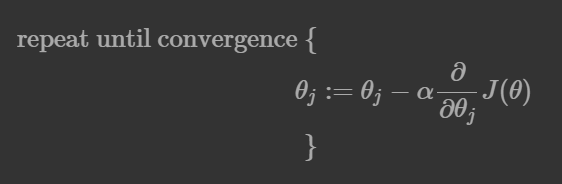

**THEN** all those parameters have to be updated simultaneously on each iteration:

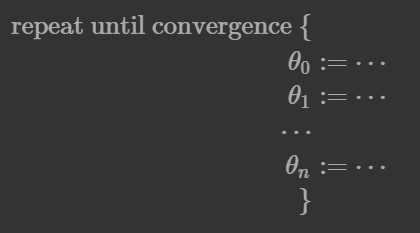

the computation of the daunting derivative will be :
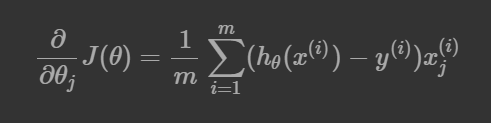

so the loop above is written like this :

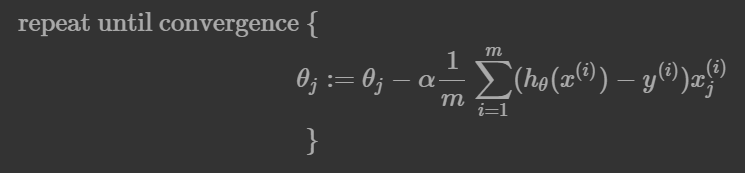

In [206]:
def gradient_descent(X, y, weights, bias, learning_rate, num_iterations):
    
    '''
    # x: (m,n) : Input data
    # y: (m,) : target variables
    # w: (n,) weights Each feature in 
                 X has a corresponding weight
                 
    # learning_rate controls how fast the model learns.
    # num_iterations how many times the grdient descent will
                  be updating the parameters
    '''
    
    m = X.shape[0]  
    cost_history = []

    for i in range(num_iterations):
        
        z = np.dot(X, weights) + bias
        y_pred = sigmoid(z)#calculating the probability 
        dw = (1/m) * np.dot(X.T, (y_pred - y))
        db = (1/m) * np.sum(y_pred - y)

        # Update weights and bias
        weights -= learning_rate * dw
        bias -= learning_rate * db
        cost = compute_cost(X, y, weights, bias)
        cost_history.append(cost)

        if i % 100 == 0:  
            print(f"Iteration {i}: Cost {cost}")
    
    return weights, bias, cost_history


In [207]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


learning_rate = 0.01
num_iterations = 1000
# Perform gradient descent
weights, bias, cost_history = gradient_descent(X_train_scaled, y_train, weights, bias, learning_rate, num_iterations)

def predict(X, weights, bias):
    z = np.dot(X, weights) + bias
    y_pred = sigmoid(z)
    return [1 if p >= 0.5 else 0 for p in y_pred]

#test and predict the labels
y_test_pred = predict(X_test_scaled, weights, bias)


Iteration 0: Cost 0.6916354321482103
Iteration 100: Cost 0.5787911689243824
Iteration 200: Cost 0.5130680237363731
Iteration 300: Cost 0.4717539843162785
Iteration 400: Cost 0.44447919857954976
Iteration 500: Cost 0.42579774777103013
Iteration 600: Cost 0.41260658621993584
Iteration 700: Cost 0.40304576651308177
Iteration 800: Cost 0.39595737426532734
Iteration 900: Cost 0.3905971651149552


In [208]:
print("weights from gradient descent ",weights)
print("bias from gradient descent ", bias)


weights from gradient descent  [ 0.16638824  0.29960699  0.02730591  0.10901171  0.05871883  0.04836396
  0.0919991   0.02939157  0.04647221  0.19277158  0.045637    0.02628308
 -0.02651139  0.07839526]
bias from gradient descent  -1.4610545229432457


In [209]:
cost_value = compute_cost(X_test_scaled, y_test, weights, bias)
print("Cost:", cost_value)

Cost: 0.4220799771976646


In [210]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 83.75%


* Since we have different datasets that we applied in it various actions through data exploration, we will work on them in order to compare 

In [211]:
datasets = [dataset1, dataset2, dataset3]
X_train_list = []
X_test_list = []
y_train_list = []
y_test_list = []


for dataset in datasets:
    X1 = dataset.drop(columns=['TenYearCHD', 'education'])
    y1 = dataset['TenYearCHD']

    X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)
    # Append the results to the corresponding lists
    X_train_list.append(X_train1)
    X_test_list.append(X_test1)
    y_train_list.append(y_train1)
    y_test_list.append(y_test1)




In [212]:
for i, dataset in enumerate(datasets, start=1):
     # Print the shapes of the train and test sets
    print(f"Dataset {i}:")
    print("X_train shape:", X_train.shape)
    print("X_test shape:", X_test.shape)
    print("y_train shape:", y_train.shape)
    print("y_test shape:", y_test.shape)
    print('-' * 30)

Dataset 1:
X_train shape: (3347, 14)
X_test shape: (837, 14)
y_train shape: (3347,)
y_test shape: (837,)
------------------------------
Dataset 2:
X_train shape: (3347, 14)
X_test shape: (837, 14)
y_train shape: (3347,)
y_test shape: (837,)
------------------------------
Dataset 3:
X_train shape: (3347, 14)
X_test shape: (837, 14)
y_train shape: (3347,)
y_test shape: (837,)
------------------------------


In [87]:
pip install tabulate


Note: you may need to restart the kernel to use updated packages.


In [214]:
from tabulate import tabulate
results = []

In [215]:
 results.append([f"Dataset ", weights, bias, cost_value, f"{accuracy * 100:.2f}%"])

In [216]:
print(results)

[['Dataset ', array([ 0.16638824,  0.29960699,  0.02730591,  0.10901171,  0.05871883,
        0.04836396,  0.0919991 ,  0.02939157,  0.04647221,  0.19277158,
        0.045637  ,  0.02628308, -0.02651139,  0.07839526]), -1.4610545229432457, 0.4220799771976646, '83.75%']]


Processing Dataset 1...
Iteration 0: Cost -0.0
Iteration 100: Cost -0.0
Iteration 200: Cost -0.0
Iteration 300: Cost -0.0
Iteration 400: Cost -0.0
Iteration 500: Cost -0.0
Iteration 600: Cost -0.0
Iteration 700: Cost -0.0
Iteration 800: Cost -0.0
Iteration 900: Cost -0.0


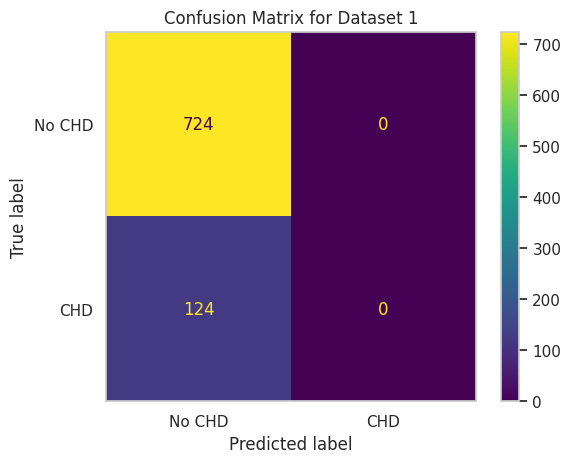

Processing Dataset 2...
Iteration 0: Cost 0.6916673392645272
Iteration 100: Cost 0.5808162778723617
Iteration 200: Cost 0.5159617336439514
Iteration 300: Cost 0.475156295275116
Iteration 400: Cost 0.4482317571741515
Iteration 500: Cost 0.42980843969459237
Iteration 600: Cost 0.41681412634774956
Iteration 700: Cost 0.4074069985844505
Iteration 800: Cost 0.4004409353454935
Iteration 900: Cost 0.395179714393847


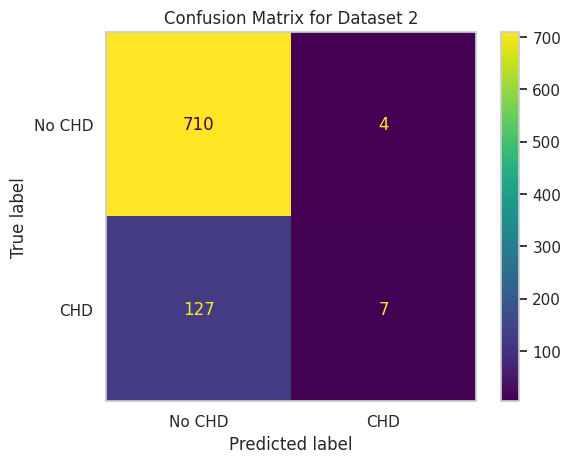

Processing Dataset 3...
Iteration 0: Cost 0.6916429900371164
Iteration 100: Cost 0.5798306759490844
Iteration 200: Cost 0.5150460300981798
Iteration 300: Cost 0.4744364792082178
Iteration 400: Cost 0.447697048141619
Iteration 500: Cost 0.4294367004775699
Iteration 600: Cost 0.41658757907834176
Iteration 700: Cost 0.4073118149057793
Iteration 800: Cost 0.40046565446331406
Iteration 900: Cost 0.39531426686855253


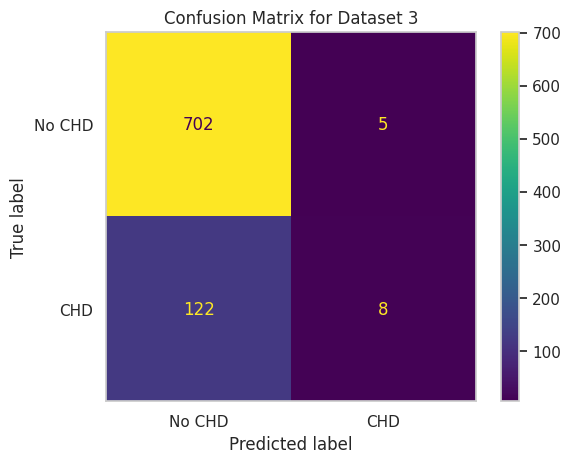

In [217]:
for i in range(len(X_train_list)):
    print(f"Processing Dataset {i+1}...")
    X_train = X_train_list[i]
    X_test = X_test_list[i]
    y_train = y_train_list[i]
    y_test = y_test_list[i]
    
    # Scaling the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    weights = np.zeros(X_train_scaled.shape[1])
    bias = 0
    
    # Performing gradient descent
    weights, bias, cost_history = gradient_descent(X_train_scaled, y_train, weights, bias, learning_rate, num_iterations)
    y_test_pred = predict(X_test_scaled, weights, bias)
    
    cost_value = compute_cost(X_test_scaled, y_test, weights, bias)
    accuracy = accuracy_score(y_test, y_test_pred)
    
    results.append([f"Dataset {i+1}", weights, bias, cost_value, f"{accuracy * 100:.2f}%"])
    disp = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, display_labels=['No CHD', 'CHD'])
    disp.ax_.set_title(f"Confusion Matrix for Dataset {i+1}")
    disp.ax_.grid(False)
    plt.show()



In [218]:
df_results = pd.DataFrame(results, columns=["Dataset", "Weights", "Bias", "Cost", "Test Accuracy"])

In [219]:
df_results

Dataset                                            Weights      Bias  \
0   Dataset   [0.16638823787163842, 0.29960699044138267, 0.0... -1.461055   
1  Dataset 1  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ... -0.003468   
2  Dataset 2  [0.14850716572393594, 0.3232785872937877, 0.03... -1.446556   
3  Dataset 3  [0.13151717128814155, 0.29148454881479197, 0.0... -1.447395   

       Cost Test Accuracy  
0  0.422080        83.75%  
1 -0.000000        85.38%  
2  0.406638        84.55%  
3  0.405802        84.83%

# HyperParameter tunning

In [223]:
dataset1.isnull().sum()
X1 = dataset1.drop(columns=['TenYearCHD', 'education'])
y1 = dataset1['TenYearCHD']

In [224]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # first we scale the data
    ('logistic', model)  
])


In [225]:
param_grid = {
    'logistic__C': [0.001, 0.01, 0.1, 1, 10], 
    'logistic__solver': ['liblinear', 'saga'], 
    'logistic__max_iter': [100, 200, 300]  # Number of iterations
}

In [226]:
# Set up GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=2)


In [229]:
X1_cleaned = X1.dropna()
y1_cleaned = y1[X1.index.isin(X1_cleaned.index)]

In [231]:
grid_search.fit(X1_cleaned, y1_cleaned)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END logistic__C=0.001, logistic__max_iter=100, logistic__solver=liblinear; total time=   0.0s
[CV] END logistic__C=0.001, logistic__max_iter=100, logistic__solver=liblinear; total time=   0.0s
[CV] END logistic__C=0.001, logistic__max_iter=100, logistic__solver=liblinear; total time=   0.0s
[CV] END logistic__C=0.001, logistic__max_iter=100, logistic__solver=liblinear; total time=   0.0s
[CV] END logistic__C=0.001, logistic__max_iter=100, logistic__solver=liblinear; total time=   0.0s
[CV] END logistic__C=0.001, logistic__max_iter=100, logistic__solver=saga; total time=   0.1s
[CV] END logistic__C=0.001, logistic__max_iter=100, logistic__solver=saga; total time=   0.1s
[CV] END logistic__C=0.001, logistic__max_iter=100, logistic__solver=saga; total time=   0.1s
[CV] END logistic__C=0.001, logistic__max_iter=100, logistic__solver=saga; total time=   0.1s
[CV] END logistic__C=0.001, logistic__max_iter=100, logistic__solve

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic', LogisticRegression())]),
             param_grid={'logistic__C': [0.001, 0.01, 0.1, 1, 10],
                         'logistic__max_iter': [100, 200, 300],
                         'logistic__solver': ['liblinear', 'saga']},
             scoring='accuracy', verbose=2)

In [232]:
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Hyperparameters: {'logistic__C': 0.1, 'logistic__max_iter': 100, 'logistic__solver': 'liblinear'}
Best Accuracy: 0.8531977456505757
